**Ch24-25: KNN、目前几种分类算法比较**

Source: 
[数据分析实战 45 讲](https://time.geekbang.org/column/intro/100021701?tab=intro)

---

# KNN: K-Nearest Neighbor -> 近朱者赤近墨者黑

1. 计算待分类物体与其他物体之间的距离

    - **"As long as models are distance-based, features must be scaled"**: or else larger features DOMINATE distances (eg. feature1 ranges 0-10000, feature2 ranges 0-1, the distance calculation will be dominated by feature1 apparently).
    
    - Those that are not distance-based do not necessarily require this, eg. tree-based models (splits based on **value thresholds**) and Naive Bayes (based on probability distributions; except for MultinomialNB, which doesn't allow for negative values).

2. 统计距离最近的 K 个邻居

3. 对于 K 个最近的邻居，它们属于哪个分类最多，待分类物体就属于哪一类（注：在实际工作中，我们需要考虑到各种可能存在的情况，比如针对某类样本少的情况，可以**增加该类别的权重**）。

* **注意注意注意！！！KNN没有模型训练环节...！你看步骤中就不用拟合最优参数给模型函数！！！**

K值的选取与模型准确性及与之相反的泛化能力息息相关，在构造参数中叫`n_neighbors`且默认为5。一般用`cross_val_score`那个交叉验证的方式，你还记得嘛！！！在Ch19的Titanic那里，把数据集K等分选一份作测试集，验证完了机器对比K取什么的时候测试集上准确率最高，就是最终K值啦。

* KD (K-Dimensional) 树是一个二叉树的数据结构，sklearn中就可以设置，方便存储样本点在K维空间中的数据。

* 用KNN做回归（预测某属性上的取值）：对于一个新的数据点，找出K个最近的邻居，将他们各自的属性取值**加权平均赋给**该点（好简单粗暴...?）。

### 回顾

再次引用在上节课SVM笔记里写的（确实还是挺喜欢这么讲的）：

* 设计矩阵中，每一个样本是里面的一行，它的每一个属性（那一列上的一个字段）可看作此空间里的一个维度。

> 感觉'空间'这个词真是辽阔呢，好像想塞什么属性作为coordinate都可以塞进去。又好像真真是i can go anywhere...


### 回顾范数

不同场景下使用不同范数表达方式：

* 闵氏：就是那个范数的统一的定义，记得不。比如切比雪夫距离就是取某个维度上面两点坐标差的最大值，即p取正无穷的闵氏距离（所以绝对值最大的那一项在求和中权重远远大于其他项嘛，其他项就都被约掉了）。
  
* 余弦距离！！计算的是两个向量的夹角，是在方向上计算两者之间的差异，对绝对数值不敏感。在兴趣相关性比较上，角度关系比距离的绝对值更重要，因此余弦距离可以用于衡量用户对内容兴趣的区分度。在这个情境中，内容是不是就是一个**空间**...?

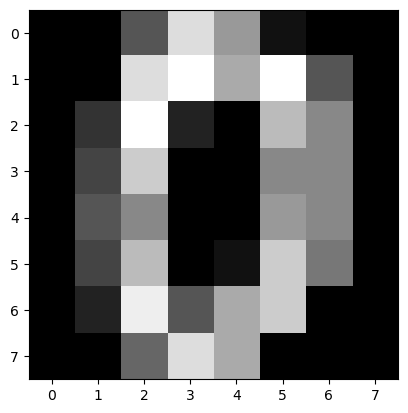

[[ 0.         -0.3448114  -0.05817854  0.74537666  0.50394048 -0.48517923
  -0.41144495 -0.13570876 -0.07068947 -0.00807265  0.65919478 -1.28109835
  -1.30482697  0.7918503  -0.50803971 -0.12460711 -0.0489116  -0.17736797
   0.89441137 -0.34826394 -0.32568106  1.32002709 -0.2469948  -0.12177327
  -0.02821663 -0.78889987 -0.34344247  1.04283627  0.99172136  1.44879714
   0.16535446 -0.03992024  0.         -0.67425249 -1.20914504 -1.26309327
  -1.20543295 -0.29456504  1.99950459  0.         -0.05994009 -0.52865727
  -1.05841775 -1.09594852 -1.22270408 -1.08378067  2.42130971 -0.09553341
  -0.04237744 -0.40552806  0.06261204 -0.09435142 -1.0387176  -1.13073758
   2.50001762  0.77700828 -0.02821663 -0.3126347  -0.31968895 -0.28929869
   0.23659996  1.55946176  2.17337726 -0.19696512]]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
KNN准确率为：0.9851851851851852
CART准确率为：0.16111111111111112
SVM准确率为：0.987037037037037
GaussianNB准确率为：0.7703703703703704
MultinomialNB准确率为：0.9
KNN准确率(K=200)为：0.86851

In [5]:
# 还是用上回我们决策树时作业题使用的手写digits数据集
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler,MinMaxScaler # 啊啊啊啊啊啊啊我每次都拼错成Scalar!!害得这次没有一次成功！！！！
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
dataset = load_digits()
features = dataset.data
targets = dataset.target
plt.gray()
plt.imshow(dataset.images[0])
plt.show()

# KNN与距离定义相关，我们需要对数据进行规范化处理，又用到StandardScalar()喵。这些模型跑下来套路一模一样，接下来我自己写：
tr_f0,te_f0,tr_t1,te_t1 = train_test_split(features,targets,test_size=0.3)
scaler = StandardScaler()
tr_f1 = scaler.fit_transform(tr_f0)
te_f1 = scaler.transform(te_f0)
print(tr_f1[0:1]) # 这数据集也是ndarray
print(type(features), type(tr_f1))
model1 = KNeighborsClassifier() # 其中有参数 metric：默认使用欧式范数即p=2
model1.fit(tr_f1,tr_t1)
te_p1 = model1.predict(te_f1)
print(f"KNN准确率为：{accuracy_score(te_t1,te_p1)}")

# 再用其他算法试试：
model2 = DecisionTreeClassifier()
model2.fit(tr_f0,tr_t1) 
# DecisionTrees don’t require feature scaling (they split based on values, not distances) -> use raw data!!!!
te_p2 = model2.predict(te_f1)
print(f"CART准确率为：{accuracy_score(te_t1,te_p2)}") # 啥情况
model3 = svm.SVC() 
model3.fit(tr_f1,tr_t1)
te_p3 = model3.predict(te_f1)
print(f"SVM准确率为：{accuracy_score(te_t1,te_p3)}")
model4 = naive_bayes.GaussianNB() # 这个类用于连续数据
model4.fit(tr_f1,tr_t1)
te_p4 = model4.predict(te_f1)
model5 = naive_bayes.MultinomialNB() # 多项式贝叶斯不能传入负值（可是Z-score规范化完有负的），故进行minmax规范化
scaler2 = MinMaxScaler()
tr_f2 = scaler2.fit_transform(tr_f0)
te_f2 = scaler2.transform(te_f0)
model5.fit(tr_f2,tr_t1)
te_p5 = model5.predict(te_f2)
print(f"GaussianNB准确率为：{accuracy_score(te_t1,te_p4)}")
print(f"MultinomialNB准确率为：{accuracy_score(te_t1,te_p5)}")


# 作业题：把K值从默认的5（可能准确率没那个高但不太可能过拟合）改成200，，，跑KNN
model6 = KNeighborsClassifier(n_neighbors=200) #其中有参数 metric：默认使用欧式范数即p=2
model6.fit(tr_f1,tr_t1)
te_p6 = model6.predict(te_f1)
print(f"KNN准确率(K=200)为：{accuracy_score(te_t1,te_p6)}")
print("这应该是过拟合了吧")


为什么Naive Bayes这么低：'Naive'就naive在它assumes feature dependence, yet pixels ARE correlated!!! (or what do you think *Global* Pixel Transformers are for。。。。)

* 为什么GaussianNB尤其低：Pixel intensities are DISCRETE **(grayscale values 0-16)**, yet GaussianNB assumes continuous data with a normal distribution.

---

## A comparison table generated by Deepseek

| **Algorithm**         | **Key Characteristics**                          | **Pros**                                  | **Cons**                                  | **Best For**                 |
|-----------------------|-------------------------------------------------|-------------------------------------------|-------------------------------------------|------------------------------|
| **KNN**               | Distance-based (e.g., Euclidean)                | Simple; No training phase                 | Slow prediction; Sensitive to scaling     | Small datasets, low dimensions |
| **Decision Tree**     | Splits data via rules (entropy/Gini)            | Interpretable; No scaling needed          | Prone to overfitting                      | Non-linear relationships       |
| **SVM (SVC)**         | Finds optimal hyperplane (kernel tricks)        | Effective in high dimensions; Scalable    | Sensitive to hyperparameters              | Complex boundaries             |
| **GaussianNB**        | Assumes features follow normal distributions    | Fast; Works with small data               | Naive assumption (independence)           | Text/continuous features       |
| **MultinomialNB**     | Models feature counts (discrete frequencies)    | Handles sparse data well                  | Requires non-negative inputs (`MinMax`)   | Text/categorical data          |

1. **KNN/SVM** benefit from scaling (use `StandardScaler`).  
2. **Decision Trees** ignore scaling but may overfit without pruning.  
3. **Naive Bayes** assumes feature independence (pixels are correlated, but often works anyway).  
